In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv("../mydata/preprocessed_data.csv")
data.head()


,Airline,Source,Destination,Duration,stops,class,depature time,arrival time,Price,Date,Days Left,Day of Week
0,Air France,CMN,NRT,1945,2,economy,Evening,Morning,1082.70,2024-07-03,36,2
1,Egypt Air,IST,CMN,1275,1,economy,Early Morning,Night,350.19,2024-06-07,10,4
2,Royal Air Maroc,IST,CMN,295,0,economy,Morning,Afternoon,603.72,2024-07-01,34,0
3,SWISS,PAR,NRT,965,1,business,Morning,Morning,4137.21,2024-06-09,12,6
4,Ajet,LAX,IST,1670,3,economy,Morning,Night,775.17,2024-06-27,30,3


In [4]:
data.dtypes

Airline           object
Source            object
Destination       object
Duration           int64
stops              int64
class             object
depature time     object
arrival time      object
Price            float64
Date              object
Days Left          int64
Day of Week        int64
dtype: object

In [5]:
data.describe()


,Duration,stops,Price,Days Left,Day of Week
count,24965.000000,24965.000000,24965.000000,24965.000000,24965.000000
mean,1021.327659,1.047827,1864.741486,21.010575,3.050150
std,534.075385,0.679869,1698.302104,11.827580,1.999351
min,165.000000,0.000000,54.540000,1.000000,0.000000
25%,635.000000,1.000000,680.130000,11.000000,1.000000
50%,1030.000000,1.000000,1128.600000,21.000000,3.000000
75%,1335.000000,1.000000,2794.230000,31.000000,5.000000
max,3635.000000,3.000000,11689.920000,41.000000,6.000000


Visualize to identify which airline has the highest number of flights.

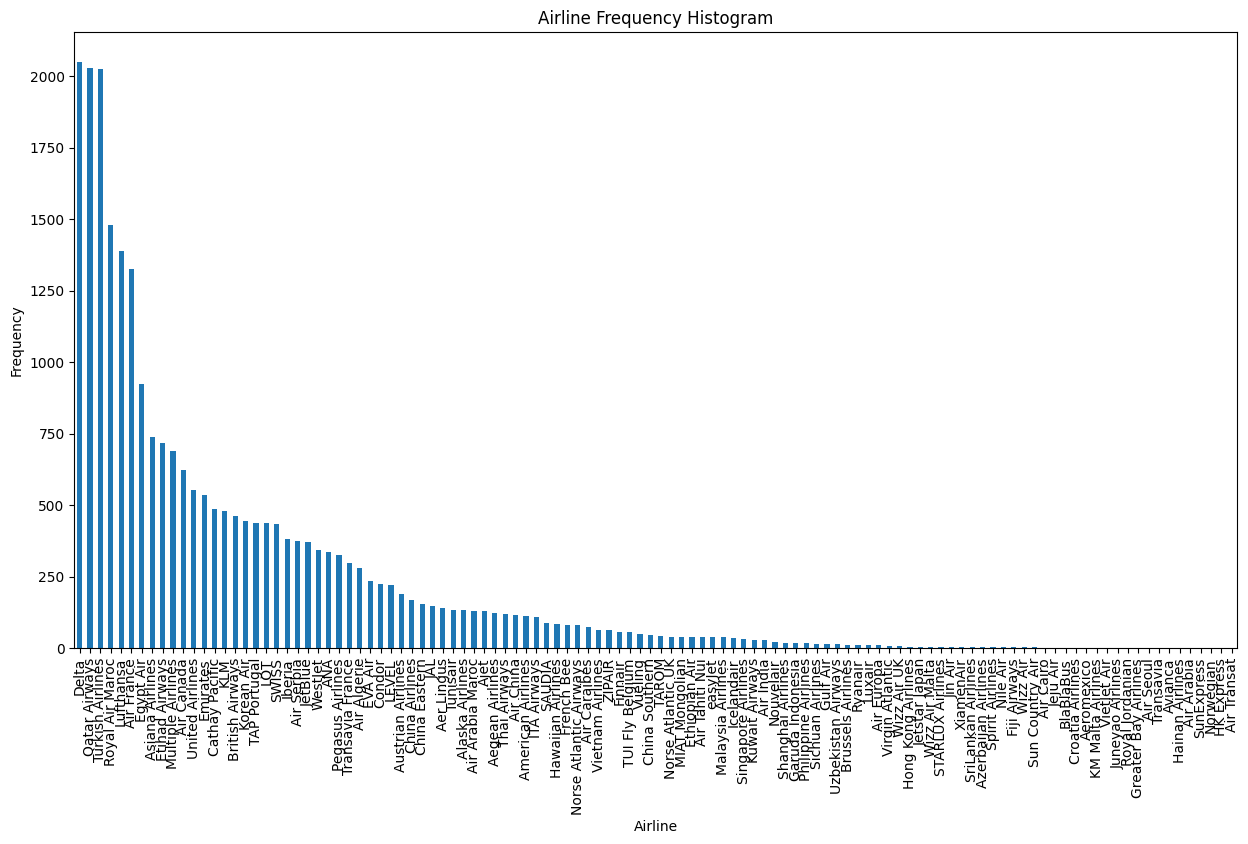

In [12]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 8))  # Width: 12, Height: 8 (adjust as needed)

# Plot the histogram
data['Airline'].value_counts().plot(kind='bar')

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.title('Airline Frequency Histogram')

# Display the plot
plt.show()


DELTA is showcasing its dominance dominance in the airline market
qatar airlines too

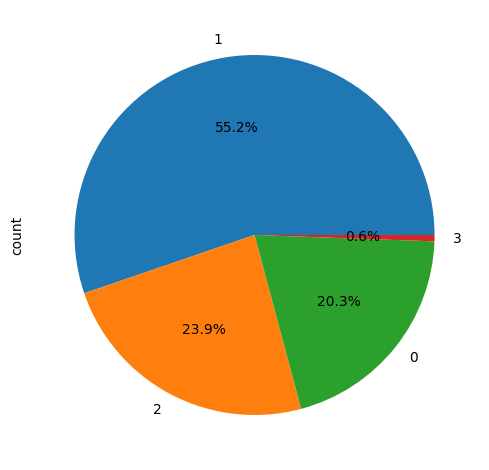

In [16]:
sizes = data['stops'].value_counts()
sizes.plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()

Most flights, about 55.2%, have one stop, while 20.3% have no stops, 23.0% have two  stops, and 0.6 have 3

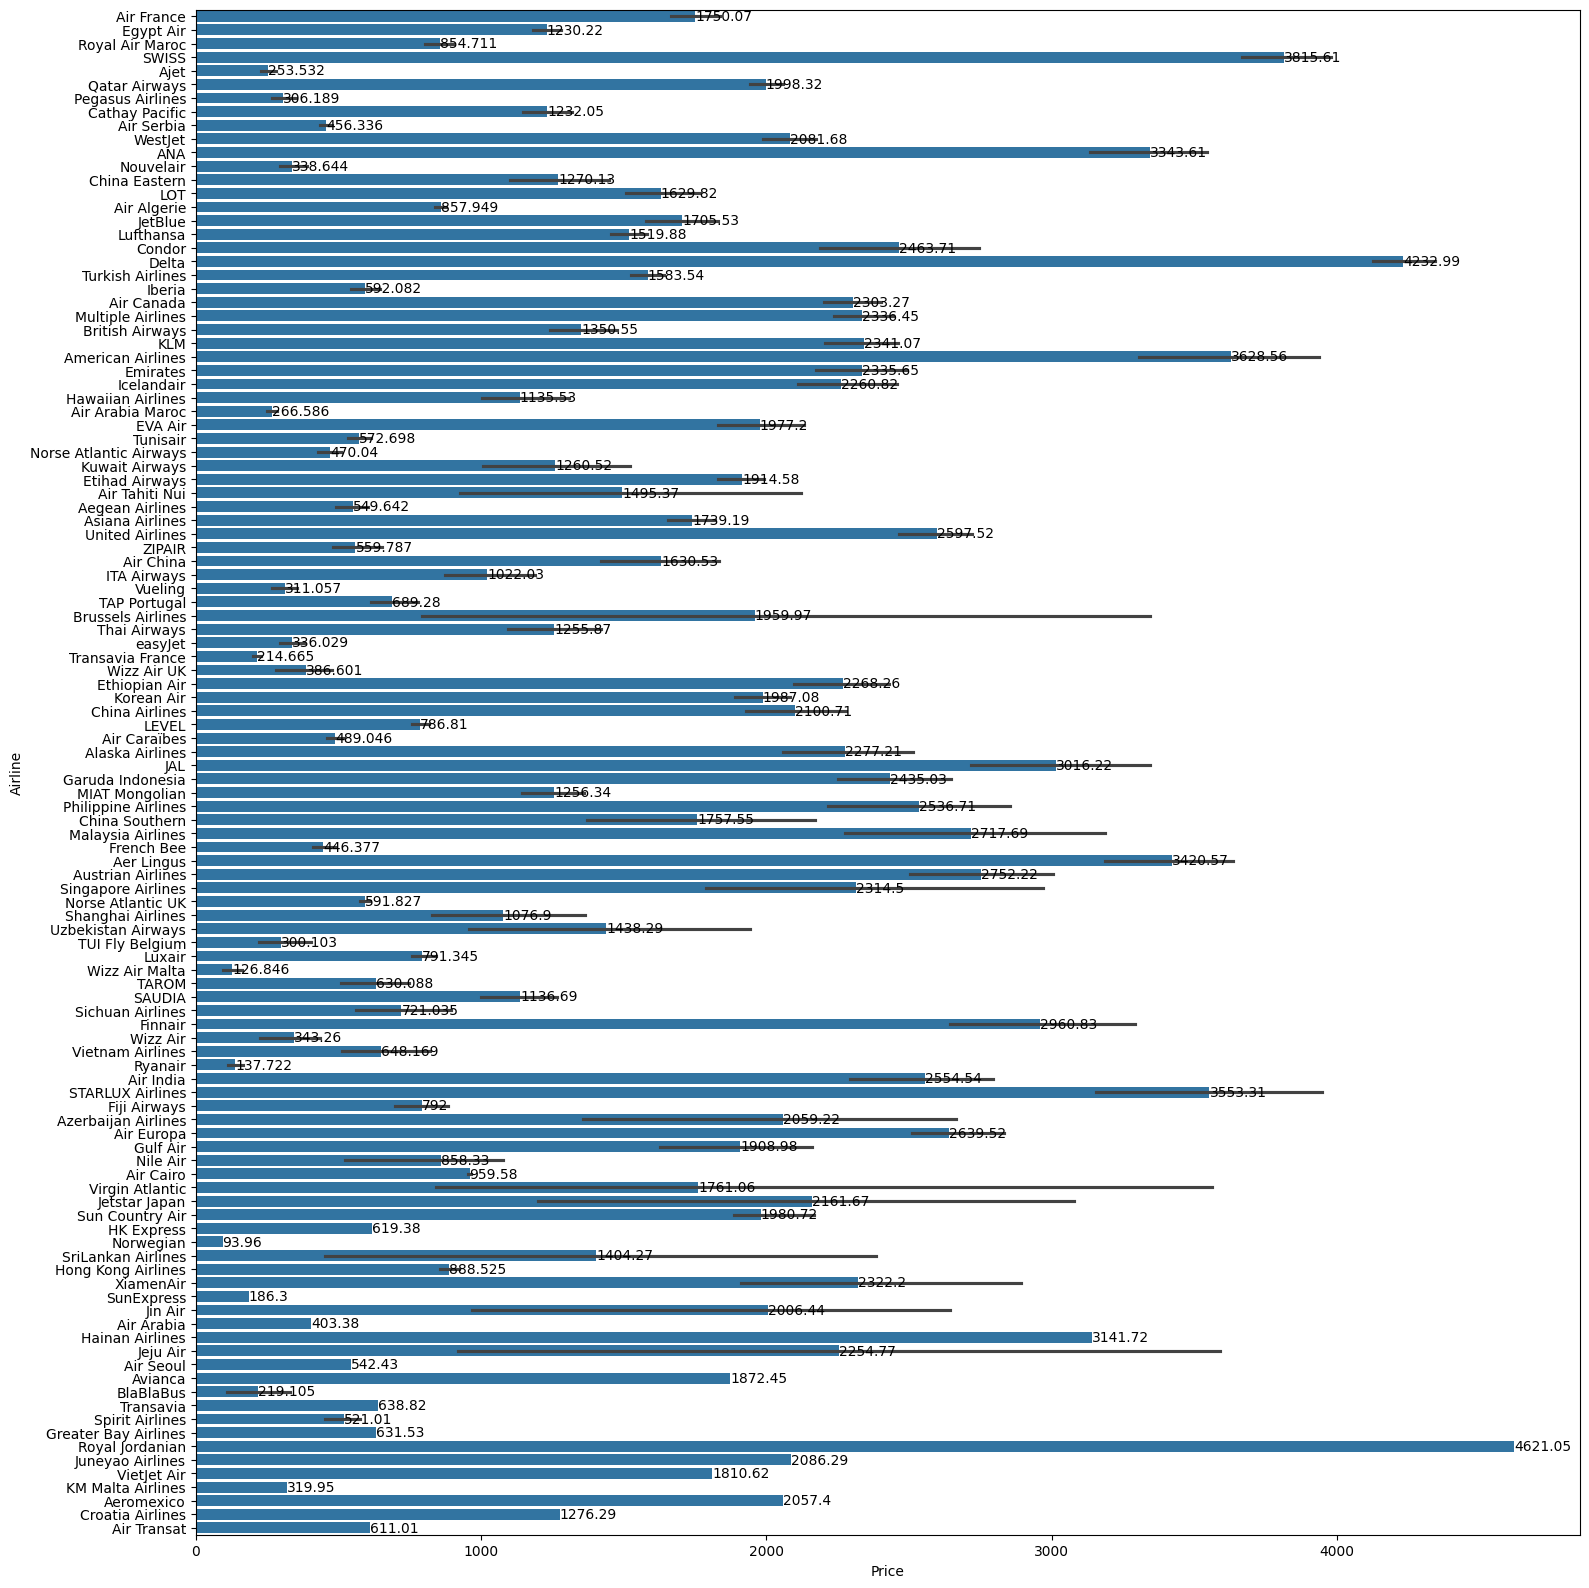

In [24]:
# Set the figure size
plt.figure(figsize=(16, 16))  # Increase the width and height as needed

# Create the horizontal bar plot
ax = sns.barplot(data=data, y='Airline', x='Price', estimator='mean')

# Add labels to the bars
ax.bar_label(ax.containers[0], fontsize=10)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

The plots reveal a significant number of tickets priced above 4k for Royal jordanian and delta. Let's explore the underlying reasons behind this trend.
Should examine the availability of business class and economy class seats offered by these airlines.

In [26]:
for airline in data['Airline'].unique():
    class_counts = data[data['Airline'] == airline]['class'].value_counts()
    print(airline)
    for class_type, count in class_counts.items():
        print(f"{class_type}: {count}")
    print("---")


Air France
business: 708
economy: 618
---
Egypt Air
business: 589
economy: 335
---
Royal Air Maroc
economy: 990
business: 490
---
SWISS
business: 330
economy: 104
---
Ajet
economy: 129
---
Qatar Airways
economy: 1175
business: 855
---
Pegasus Airlines
economy: 317
business: 9
---
Cathay Pacific
economy: 434
business: 51
---
Air Serbia
business: 252
economy: 124
---
WestJet
business: 255
economy: 89
---
ANA
business: 181
economy: 155
---
Nouvelair
economy: 21
---
China Eastern
economy: 108
business: 47
---
LOT
business: 245
economy: 192
---
Air Algerie
business: 279
economy: 3
---
JetBlue
economy: 265
business: 108
---
Lufthansa
business: 704
economy: 683
---
Condor
economy: 126
business: 97
---
Delta
business: 1325
economy: 726
---
Turkish Airlines
economy: 1049
business: 975
---
Iberia
business: 292
economy: 90
---
Air Canada
business: 415
economy: 207
---
Multiple Airlines
business: 441
economy: 250
---
British Airways
business: 261
economy: 202
---
KLM
business: 291
economy: 187
---

Delta
business: 1325
economy: 726
delta had way more businees tickets offered
Royal jordanian only had 1 biz class in the data scrapped.

This factor significantly contributes to the higher mean prices observed for both airlines.



RElation between flight price and days left for flight

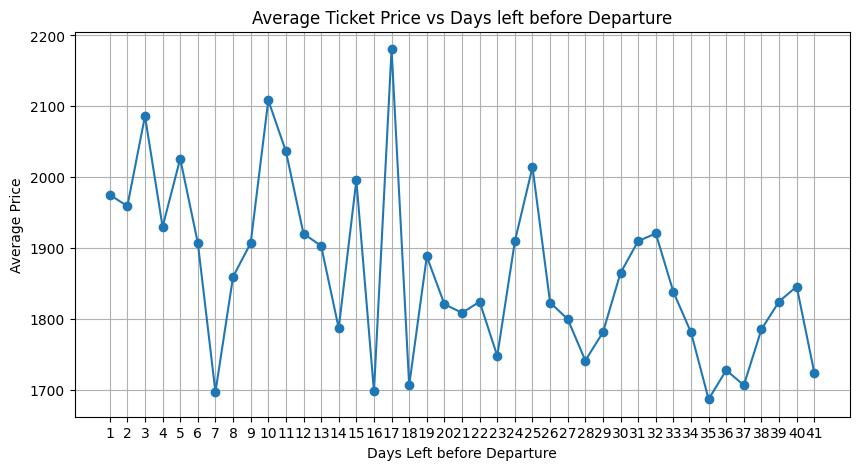

In [29]:
days_price_mean = data.groupby('Days Left')['Price'].mean()

plt.figure(figsize=(10, 5))
plt.plot(days_price_mean.index, days_price_mean.values, 'o-')
plt.title('Average Ticket Price vs Days left before Departure')
plt.xlabel('Days Left before Departure')
plt.ylabel('Average Price')
plt.xticks(days_price_mean.index)  # Ensure all days are shown on the x-axis
plt.grid(True)  # Add grid lines for better readability
plt.show()


Ticket prices tend to decrease one day before the event, followed by an increase

Does ticket price change based on the departure time?


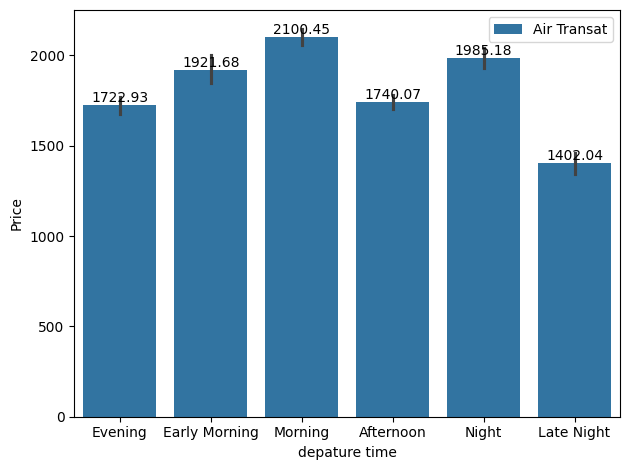

In [33]:
ax = sns.barplot(data=data, x='depature time', y='Price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

Morning flights are the most expensive.

Late-night flights are the least expensive.

Considering these trends, opting for a late-night flight could be a cost-effective choice for your next trip.



Does ticket price change based on the arrival time?


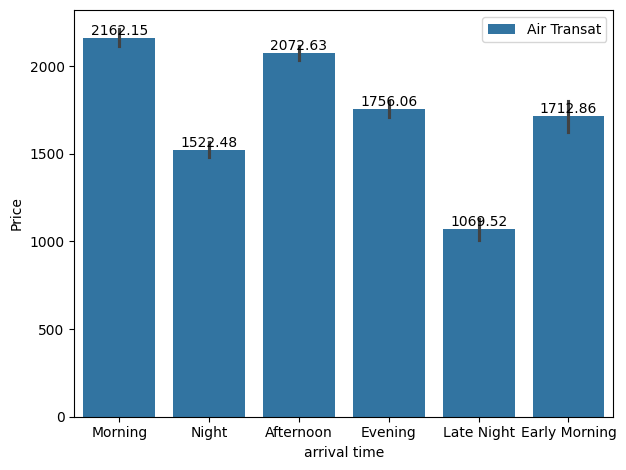

In [34]:
ax = sns.barplot(data=data, x='arrival time', y='Price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

flights that arrive in the morning are the most expensive

while the ones that arrive during late night are the cheapest with prices less than half of those for that arrive during the morning.

HOW DOES PRICE VARIES WITH CLASS BIZ AND ECO


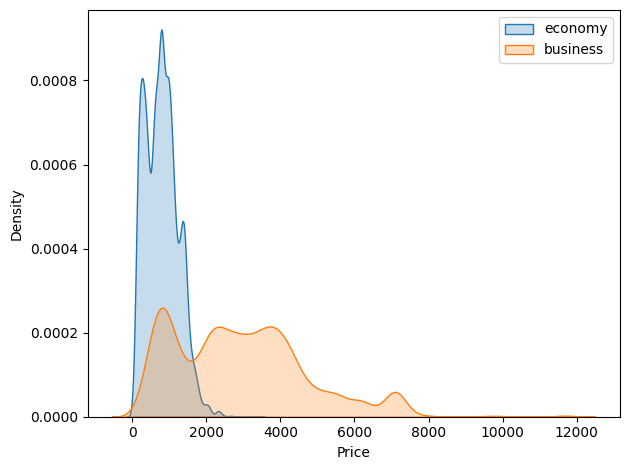

In [35]:
flight_classes = data['class'].unique()
for i, flight_class in enumerate(flight_classes):
    class_df = data[data['class'] == flight_class]   
    sns.kdeplot(data=class_df, x='Price',fill=True, label=flight_class)

plt.tight_layout()
plt.legend()

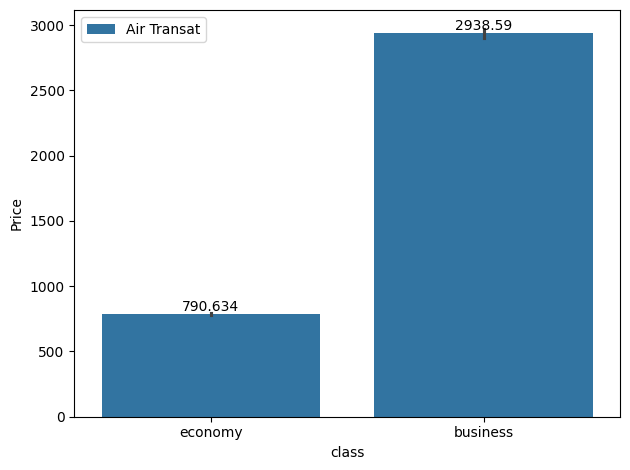

In [36]:
ax = sns.barplot(data=data, x='class',y='Price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

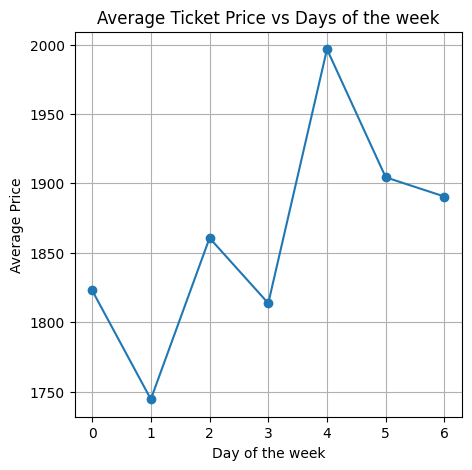

In [39]:
daysofweek_price_mean = data.groupby('Day of Week')['Price'].mean()

plt.figure(figsize=(5, 5))
plt.plot(daysofweek_price_mean.index, daysofweek_price_mean.values, 'o-')
plt.title('Average Ticket Price vs Days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average Price')
plt.xticks(daysofweek_price_mean.index)  # Ensure all days are shown on the x-axis
plt.grid(True)  # Add grid lines for better readability
plt.show()
#0 stands for monday 1 tuesday....


tuesday is the cheaper day to fly
friday is the most expensive

APPLYING TRANSFORMATIONS

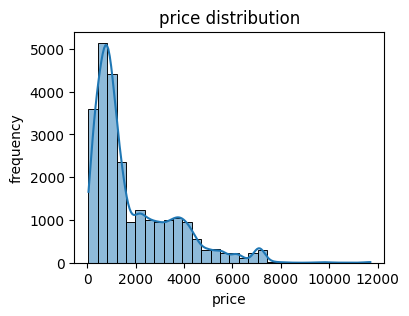

In [49]:
plt.figure(figsize=(4, 3))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('price distribution')
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

we notice that the price follows the log distribution. lets mesure the skewness

In [52]:
from scipy.stats import skew
# Calculate skewness for the 'Price' feature
price_skewness = skew(data['Price'])
print(f"Skewness for Price: {price_skewness}")

Skewness for Price: 1.488060997861179


In [54]:
data['Price'] = np.log(data['Price'])

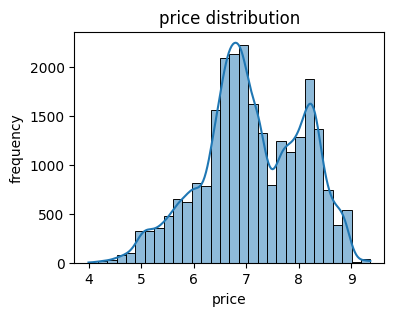

In [55]:
plt.figure(figsize=(4, 3))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('price distribution')
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

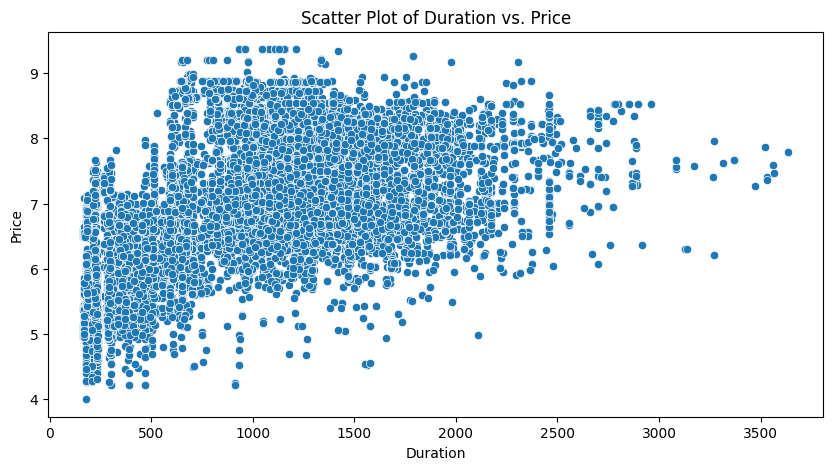

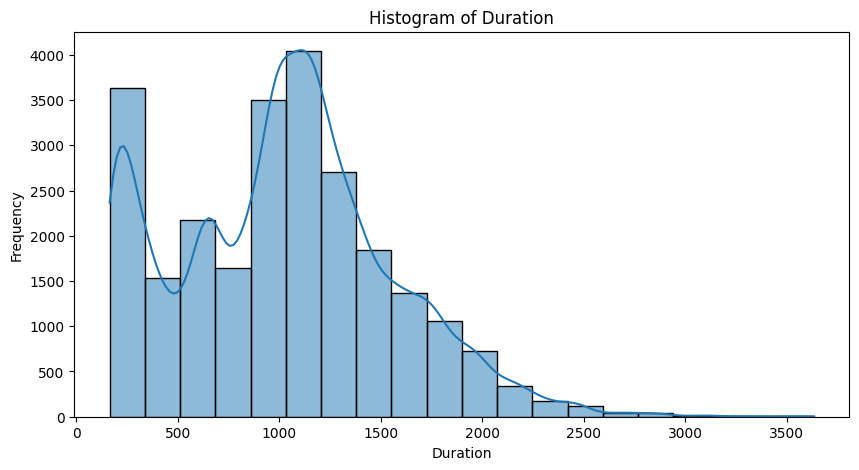

In [56]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Duration', y='Price')
plt.title('Scatter Plot of Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

# Histogram of Duration
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Duration', bins=20, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [58]:
%pip install statsmodels


                                              0.0/9.9 MB ? eta -:--:--
                                              0.1/9.9 MB 2.6 MB/s eta 0:00:04
                                              0.2/9.9 MB 2.9 MB/s eta 0:00:04
     -                                        0.3/9.9 MB 2.2 MB/s eta 0:00:05
     -                                        0.4/9.9 MB 2.5 MB/s eta 0:00:04
     -                                        0.4/9.9 MB 2.5 MB/s eta 0:00:04
     --                                       0.7/9.9 MB 2.4 MB/s eta 0:00:04
     ---                                      0.8/9.9 MB 2.6 MB/s eta 0:00:04
     ---                                      0.8/9.9 MB 2.6 MB/s eta 0:00:04
     ----                                     1.1/9.9 MB 2.5 MB/s eta 0:00:04
     ----                                     1.2/9.9 MB 2.5 MB/s eta 0:00:04
     -----                                    1.3/9.9 MB 2.4 MB/s eta 0:00:04
     -----                                    1.3/9.9 MB 2.4 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


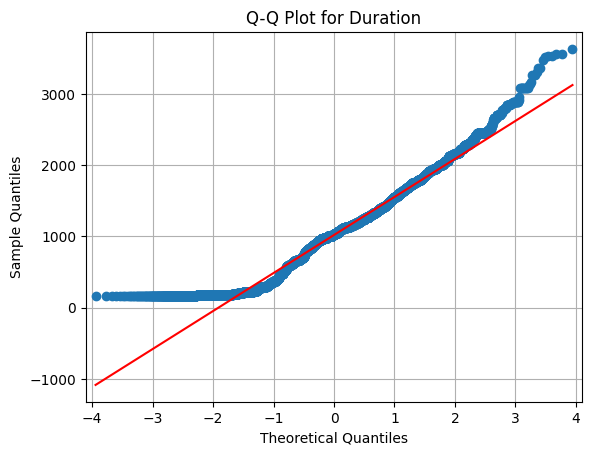

In [59]:
import statsmodels.api as sm
# Generate a Q-Q plot for the 'Duration' variable
sm.qqplot(data['Duration'], line='s', ax=plt.gca())
plt.title('Q-Q Plot for Duration')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [60]:
data['Duration_log'] = np.log(data['Duration'])

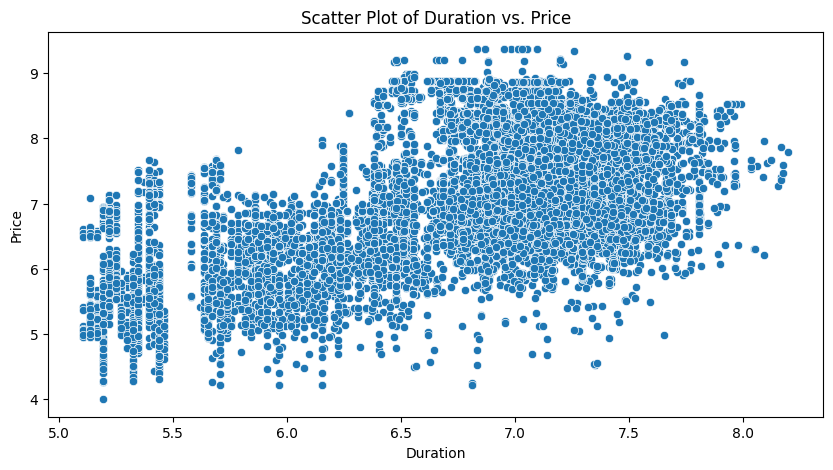

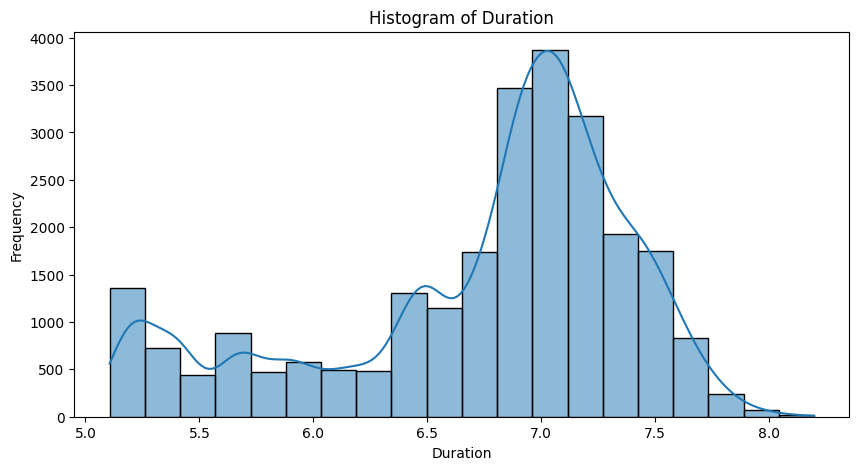

In [61]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Duration_log', y='Price')
plt.title('Scatter Plot of Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

# Histogram of Duration
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Duration_log', bins=20, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [62]:
from scipy.stats import boxcox
data['Duration_boxcox'], _ = boxcox(data['Duration'])

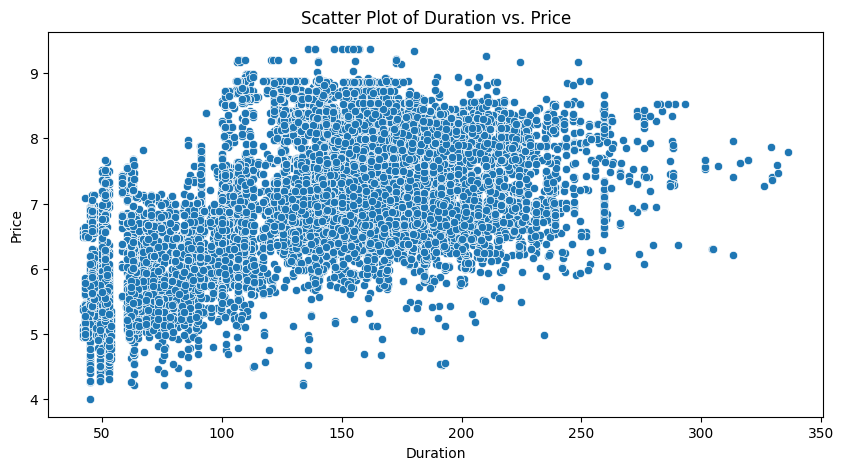

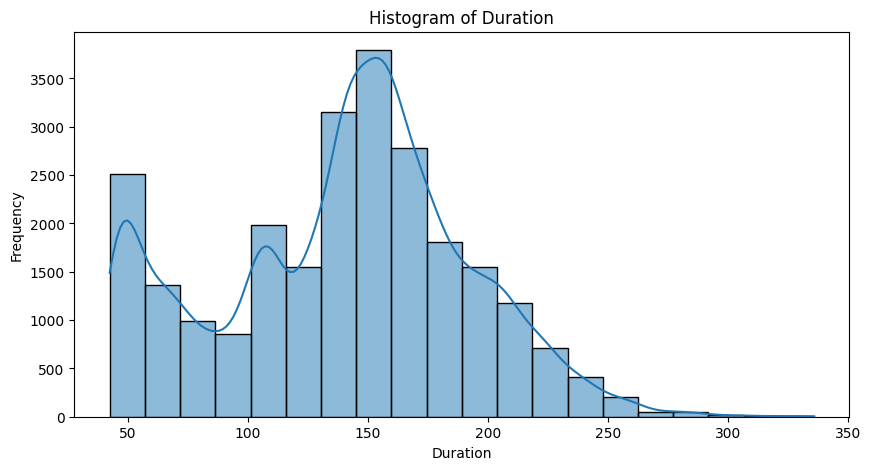

In [63]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Duration_boxcox', y='Price')
plt.title('Scatter Plot of Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

# Histogram of Duration
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Duration_boxcox', bins=20, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [64]:
columns_to_drop = ['Duration_boxcox', 'Duration']  # List of column names to drop
# Drop the specified columns from the DataFrame
data = data.drop(columns=columns_to_drop, axis=1)

In [65]:
data

,Airline,Source,Destination,stops,class,depature time,arrival time,Price,Date,Days Left,Day of Week,Duration_log
0,Air France,CMN,NRT,2,economy,Evening,Morning,6.987213,2024-07-03,36,2,7.573017
1,Egypt Air,IST,CMN,1,economy,Early Morning,Night,5.858476,2024-06-07,10,4,7.150701
2,Royal Air Maroc,IST,CMN,0,economy,Morning,Afternoon,6.403111,2024-07-01,34,0,5.686975
3,SWISS,PAR,NRT,1,business,Morning,Morning,8.327777,2024-06-09,12,6,6.872128
4,Ajet,LAX,IST,3,economy,Morning,Night,6.653082,2024-06-27,30,3,7.420579
...,...,...,...,...,...,...,...,...,...,...,...,...
24960,Etihad Airways,NRT,PAR,1,economy,Evening,Morning,6.627684,2024-07-03,36,2,7.150701
24961,Qatar Airways,IST,NRT,1,business,Night,Evening,8.218005,2024-06-07,10,4,6.917706
24962,Cathay Pacific,NRT,CMN,2,economy,Afternoon,Afternoon,6.937363,2024-05-30,2,3,7.575585
24963,Singapore Airlines,NRT,PAR,1,business,Morning,Morning,7.897702,2024-06-24,27,0,7.405496


ENCODING CATEGORICAL VARIABLES

label encoding

In [66]:
le=LabelEncoder()
ordinal_variables=['Airline','class','depature time','arrival time']
data[ordinal_variables] = data[ordinal_variables].apply(lambda col: le.fit_transform(col))

one hot encoding

In [67]:
final_df= pd.get_dummies(data, columns=['Source', 'Destination'])
final_df

,Airline,stops,class,depature time,arrival time,Price,Date,Days Left,Day of Week,Duration_log,Source_CMN,Source_IST,Source_LAX,Source_NRT,Source_PAR,Destination_CMN,Destination_IST,Destination_LAX,Destination_NRT,Destination_PAR
0,12,2,1,2,4,6.987213,2024-07-03,36,2,7.573017,True,False,False,False,False,False,False,False,True,False
1,36,1,1,1,5,5.858476,2024-06-07,10,4,7.150701,False,True,False,False,False,True,False,False,False,False
2,78,0,1,4,0,6.403111,2024-07-01,34,0,5.686975,False,True,False,False,False,True,False,False,False,False
3,83,1,0,4,4,8.327777,2024-06-09,12,6,6.872128,False,False,False,False,True,False,False,False,True,False
4,18,3,1,4,5,6.653082,2024-06-27,30,3,7.420579,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24960,39,1,1,2,4,6.627684,2024-07-03,36,2,7.150701,False,False,False,True,False,False,False,False,False,True
24961,77,1,0,5,2,8.218005,2024-06-07,10,4,6.917706,False,True,False,False,False,False,False,False,True,False
24962,28,2,1,0,0,6.937363,2024-05-30,2,3,7.575585,False,False,False,True,False,True,False,False,False,False
24963,86,1,0,4,4,7.897702,2024-06-24,27,0,7.405496,False,False,False,True,False,False,False,False,False,True


In [68]:
final_df.drop(columns="Date",inplace=True)

In [69]:
final_df.to_csv("../mydata/datafinal.csv", index=False)